# Reconocimiento de Patrones en Imagenes - Clase 16

[[3 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 3]]


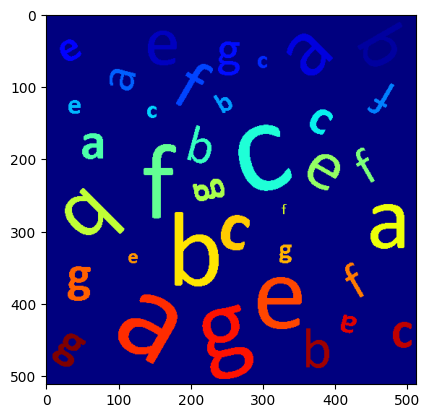

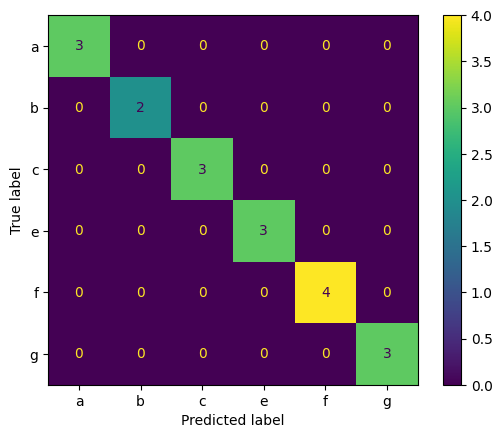

In [49]:
"""
 Universidad Diego Portales
 Facultad de Ingeniería y Ciencias
 Reconocimiento de Patrones en imágenes

 Ejemplo completo de extracción y clasificacion con K Vecinos Cercanos

 Características:
    + Dataset: Imagen con Letras
    + Features: Momentos invariantes de Hu + Excentricidad
    +

 Autor:. Miguel Carrasco (17-08-2023)
 rev.1.1
"""

import cv2
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Leemos la imagen y la clase
img = cv2.imread('../IMG/sopa_letras.png')
clase = pd.read_csv('../IMG/clase_letras.csv')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = (gray< 1)*1

# transformamos la imagen en objetos y extraemos las estadísticas por region
regiones = label(bw)
sts = regionprops(label_image=regiones)

plt.figure()
plt.imshow(regiones, cmap='jet')

# extraemos los descriptores
data = []
cont = 1
for region in sts:
    xy= region.centroid
    hu = region.moments_hu
    so = [ region.eccentricity]
    data.append(np.append(hu, so))
    #plt.text(xy[1], xy[0], f'{cont}', bbox=dict(facecolor='white', alpha=0.2))
    cont +=1


# construimos el dataset
X = np.vstack(data)
y = clase.to_numpy().ravel()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50)

#aplicamos el algoritmo KNN
n_neighbors = 4 #número de vecinos
model = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', algorithm='ball_tree')

# evaluación del modelo
model.fit(X_train, y_train)

# predicción del modelo
y_test_knn = model.predict(X_test)

# matriz de confusión
conf_mat = confusion_matrix(y_test_knn, y_test)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['a', 'b', 'c', 'e', 'f', 'g'])
disp.plot()
plt.show()

